## Plotting the ECMWF Forecast Data  
The Ensemble data and the control forecast should be plotted on a local scale (region of southern/ western Germany). Also it should be compared for some single locations. The timeseries shows the evoultion of the forecast for the total precipitation on the 18th of may 2024.

In [5]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

ModuleNotFoundError: No module named 'cartopy'

In [2]:
pip install cartopy

Note: you may need to restart the kernel to use updated packages.  Installing build dependencies: started


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\Ruben\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\python.exe' 'C:\Users\Ruben\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\pip\_vendor\pep517\in_process\_in_process.py' build_wheel 'C:\Users\Ruben\AppData\Local\Temp\tmpjkq9t2kc'
       cwd: C:\Users\Ruben\AppData\Local\Temp\pip-install-y6czwtoc\cartopy_b0ec46525e3b461e9e68c5dab655e551
  Complete output (284 lines):
  <string>:90: UserWarning: Unable to determine GEOS version. Ensure you have 3.7.2 or later installed, or installation may fail.
  WARNING setuptools_scm.pyproject_reading toml section missing 'pyproject.toml does not contain a tool.setuptools_scm section'
  Traceback (most recent call last):
    File "C:\Users\Ruben\AppData\Local\Temp\pip-build-env-5y1g83yz\overlay\Lib\site-packages\setuptools_scm\_integration\pyproject_reading.py", lin


  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
Failed to build cartopy



  creating build\lib.win-amd64-cpython-38\cartopy
  copying lib\cartopy\crs.py -> build\lib.win-amd64-cpython-38\cartopy
  copying lib\cartopy\geodesic.py -> build\lib.win-amd64-cpython-38\cartopy
  copying lib\cartopy\img_transform.py -> build\lib.win-amd64-cpython-38\cartopy
  copying lib\cartopy\util.py -> build\lib.win-amd64-cpython-38\cartopy
  copying lib\cartopy\vector_transform.py -> build\lib.win-amd64-cpython-38\cartopy
  copying lib\cartopy\_epsg.py -> build\lib.win-amd64-cpython-38\cartopy
  copying lib\cartopy\_version.py -> build\lib.win-amd64-cpython-38\cartopy
  copying lib\cartopy\__init__.py -> build\lib.win-amd64-cpython-38\cartopy
  creating build\lib.win-amd64-cpython-38\cartopy\feature
  copying lib\cartopy\feature\nightshade.py -> build\lib.win-amd64-cpython-38\cartopy\feature
  copying lib\cartopy\feature\__init__.py -> build\lib.win-amd64-cpython-38\cartopy\feature
  creating build\lib.win-amd64-cpython-38\cartopy\io
  copying lib\cartopy\io\img_nest.py -> bui

  copying lib\cartopy\tests\mpl\baseline_images\mpl\test_mpl_integration\test_global_map_RotatedPole.png -> build\lib.win-amd64-cpython-38\cartopy\tests\mpl\baseline_images\mpl\test_mpl_integration
  copying lib\cartopy\tests\mpl\baseline_images\mpl\test_mpl_integration\test_global_map_SouthPolarStereo.png -> build\lib.win-amd64-cpython-38\cartopy\tests\mpl\baseline_images\mpl\test_mpl_integration
  copying lib\cartopy\tests\mpl\baseline_images\mpl\test_mpl_integration\test_global_map_Stereographic.png -> build\lib.win-amd64-cpython-38\cartopy\tests\mpl\baseline_images\mpl\test_mpl_integration
  copying lib\cartopy\tests\mpl\baseline_images\mpl\test_mpl_integration\test_global_map_TransverseMercator.png -> build\lib.win-amd64-cpython-38\cartopy\tests\mpl\baseline_images\mpl\test_mpl_integration
  creating build\lib.win-amd64-cpython-38\cartopy\tests\mpl\baseline_images\mpl\test_nightshade
  copying lib\cartopy\tests\mpl\baseline_images\mpl\test_nightshade\nightshade_platecarree.png -> 

## Read all data

In [5]:
dt13_pf = xr.open_dataset('data/enfo_pf_2024_05_13.nc')

In [15]:
dt13_pf['tp'].sel(time=datetime_str)

<xarray.DataArray 'tp' (number: 100, latitude: 121, longitude: 240)> Size: 23MB
[2904000 values with dtype=float64]
Coordinates:
  * longitude  (longitude) float32 960B 0.0 1.5 3.0 4.5 ... 355.5 357.0 358.5
  * latitude   (latitude) float32 484B 90.0 88.5 87.0 85.5 ... -87.0 -88.5 -90.0
  * number     (number) int32 400B 1 2 3 4 5 6 7 8 ... 93 94 95 96 97 98 99 100
    time       datetime64[ns] 8B 2024-05-18
Attributes:
    units:      kg m**-2
    long_name:  Total Precipitation

In [6]:
dt13_pf

<xarray.Dataset> Size: 581MB
Dimensions:    (longitude: 240, latitude: 121, number: 100, time: 25)
Coordinates:
  * longitude  (longitude) float32 960B 0.0 1.5 3.0 4.5 ... 355.5 357.0 358.5
  * latitude   (latitude) float32 484B 90.0 88.5 87.0 85.5 ... -87.0 -88.5 -90.0
  * number     (number) int32 400B 1 2 3 4 5 6 7 8 ... 93 94 95 96 97 98 99 100
  * time       (time) datetime64[ns] 200B 2024-05-13 ... 2024-05-19
Data variables:
    tp         (time, number, latitude, longitude) float64 581MB ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-06-27 13:52:40 GMT by grib_to_netcdf-2.33.2: /opt/ecmw...

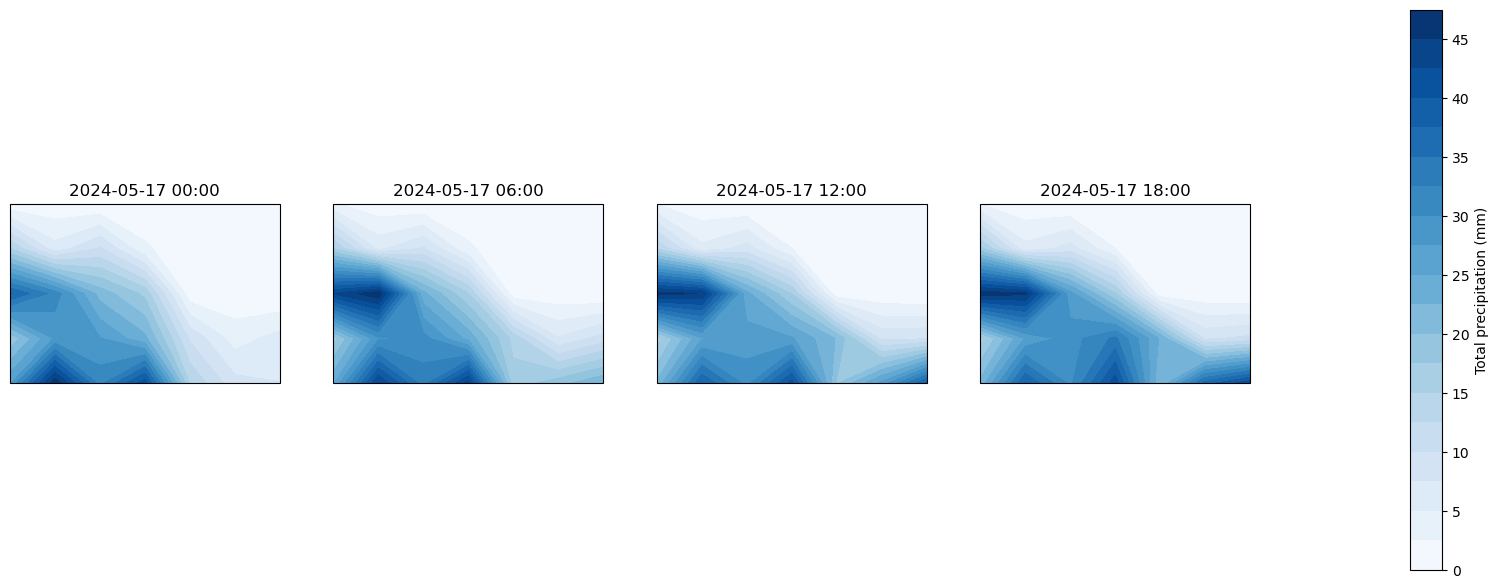

In [32]:
# Definieren der Region (Beispielbereich für Deutschland)
lat_min, lat_max = 47.0, 55.0   # Latitude Bereich
lon_min, lon_max = 5.5, 15.5    # Longitude Bereich

model_number = 1

dates = ['2024-05-17']
time_points = ['00:00:00.000000000', '06:00:00.000000000', 
               '12:00:00.000000000', '18:00:00.000000000']

# Cartopy Feature für Küstenlinien und politische Grenzen
land_feature = cfeature.NaturalEarthFeature(
    category='physical', name='land', scale='10m',
    edgecolor='face', facecolor=cfeature.COLORS['land']
)

# Erstellen eines Plots mit vier Subplots für jeden Zeitpunkt und jedes Datum
fig, axs = plt.subplots(len(dates), len(time_points), figsize=(16, 8), subplot_kw={'projection': ccrs.PlateCarree()}, squeeze=False)
cbar = None
cbar_ax = fig.add_axes([1., 0.15, 0.02, 0.7])

for j, date in enumerate(dates):
    for i, time in enumerate(time_points):
        try:
            datetime_str = f"{date}T{time}"
            # select data for specific time step
            precip_data = dt13_pf['tp'].sel(time=datetime_str)
            
            # choose a region
            precip_data = precip_data.sel(latitude=slice(lat_max, lat_min),  
                                         longitude=slice(lon_min, lon_max),
                                         number=slice(model_number))

            lon = precip_data.longitude.values
            lat = precip_data.latitude.values

            # Matrix for plot
            precip_matrix = precip_data.values 

            # change title for subplots
            title_parts = datetime_str.split('T')
            date_part = title_parts[0]
            time_part = title_parts[1][:5]
            
            plot_title = f"{date_part} {time_part}"
            # make the plot
            im = axs[j, i].contourf(lon, lat, precip_matrix[0, :, :], cmap='Blues', levels=20, transform=ccrs.PlateCarree())
            axs[j, i].set_title(plot_title)
            axs[j, i].set_xlabel('Longitude')
            axs[j, i].set_ylabel('Latitude')
            axs[j, i].add_feature(land_feature, zorder=0)
            if cbar is None:
                cbar = fig.colorbar(im, cax=cbar_ax, orientation='vertical', label='Total precipitation (mm)')
        
        except KeyError as e:
            print(f"Error selecting data for time {datetime_str}: {e}")

#plt.tight_layout()
plt.show()